# Solar Panel Energy Production

##### Objective

The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

#### Data Set Description

The file solarpowergeneration.csv contains the data for this example. Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920. We have the following variables for this analysis:

* distance_to_solar_noon, in radians.
* temperature, daily average temperature, in degrees Celsius.
* wind_direction, daily average wind direction, in degrees (0-360).
* wind_speed, daily average wind speed, in meters per second.
* sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.
* visibility, in kilometers.
* humidity, in percentage.
* average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.
* average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.
* power_generated(Target), in Jules for each 3 hours


In [65]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load the dataset
df = pd.read_csv('solarpowergeneration.csv')

In [67]:
#display first 5 rows
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [68]:
#shape
df.shape

(2920, 10)

In [69]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [70]:
#statistical summery
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [71]:
df.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [73]:
#check for missing values
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

There is one missing value at average wind speed column

In [74]:
#drop the missing values
df.dropna(inplace=True)

In [75]:
#Check missing values again
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

### Visualization : Distribution of Target Variable

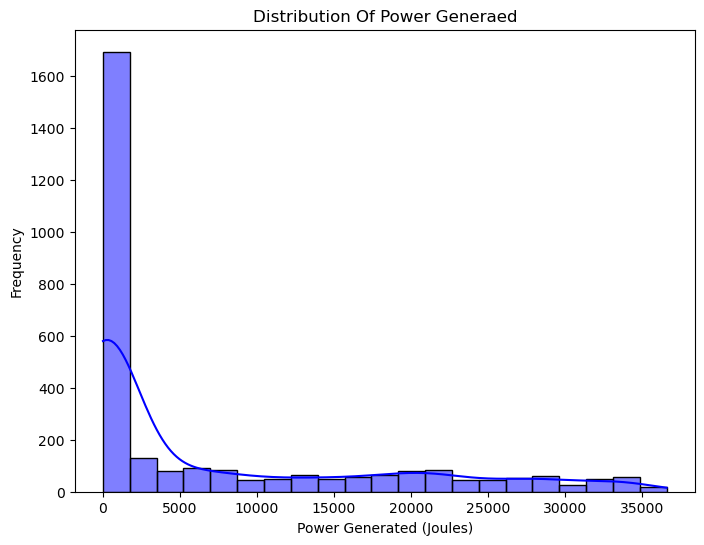

In [76]:
plt.figure(figsize=(8,6))
sns.histplot(df['power-generated'],kde=True, color='blue')
plt.title('Distribution Of Power Generaed')
plt.xlabel('Power Generated (Joules)')
plt.ylabel('Frequency')
plt.show()

## Data preprocessing

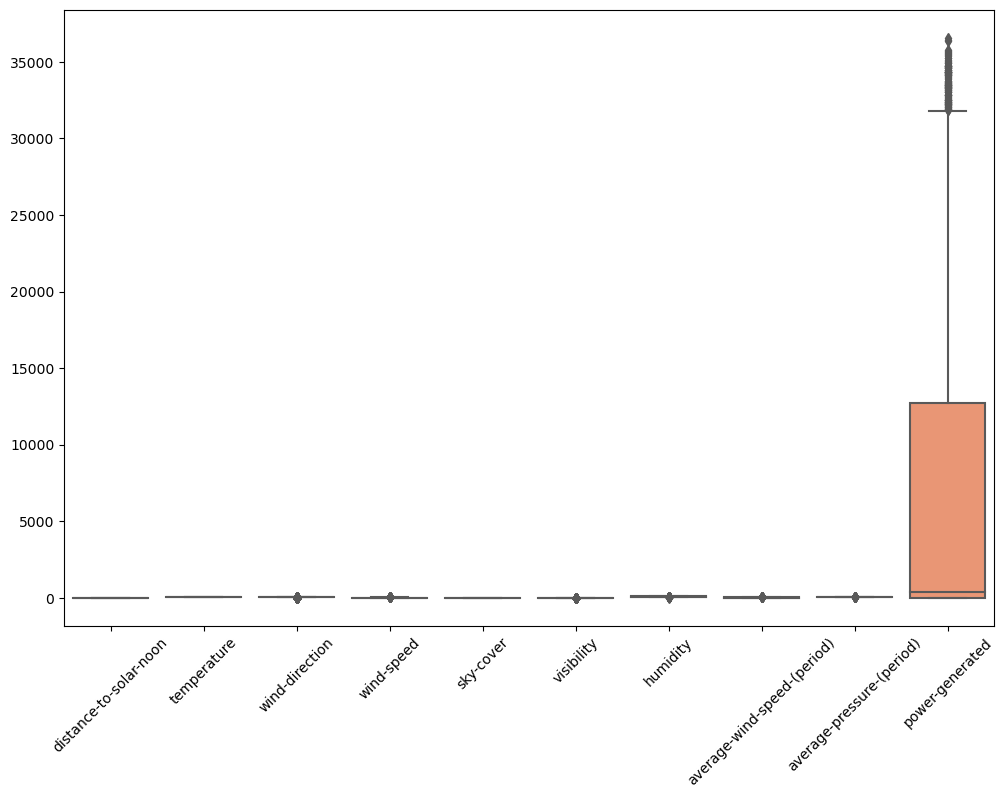

In [77]:
from scipy import stats

# Visualization: Boxplot to detect outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df,palette='Set2')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Removing outliers using Z-score
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

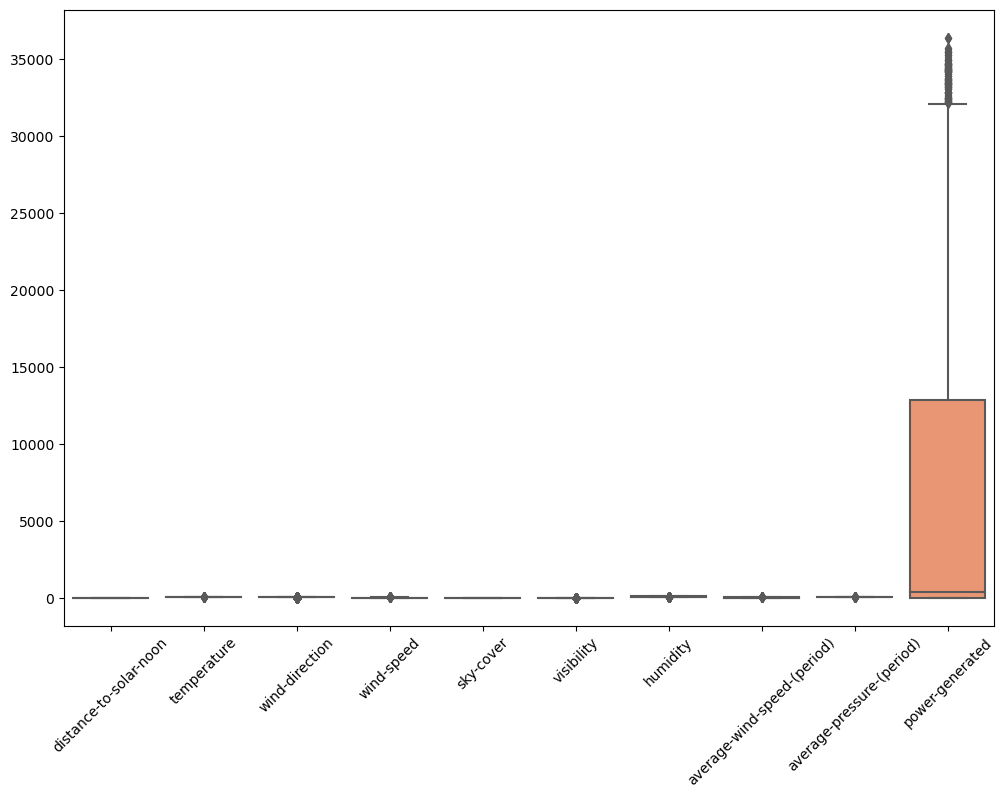

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,palette='Set2')
plt.xticks(rotation=45)
plt.show()

### Feature Scaling

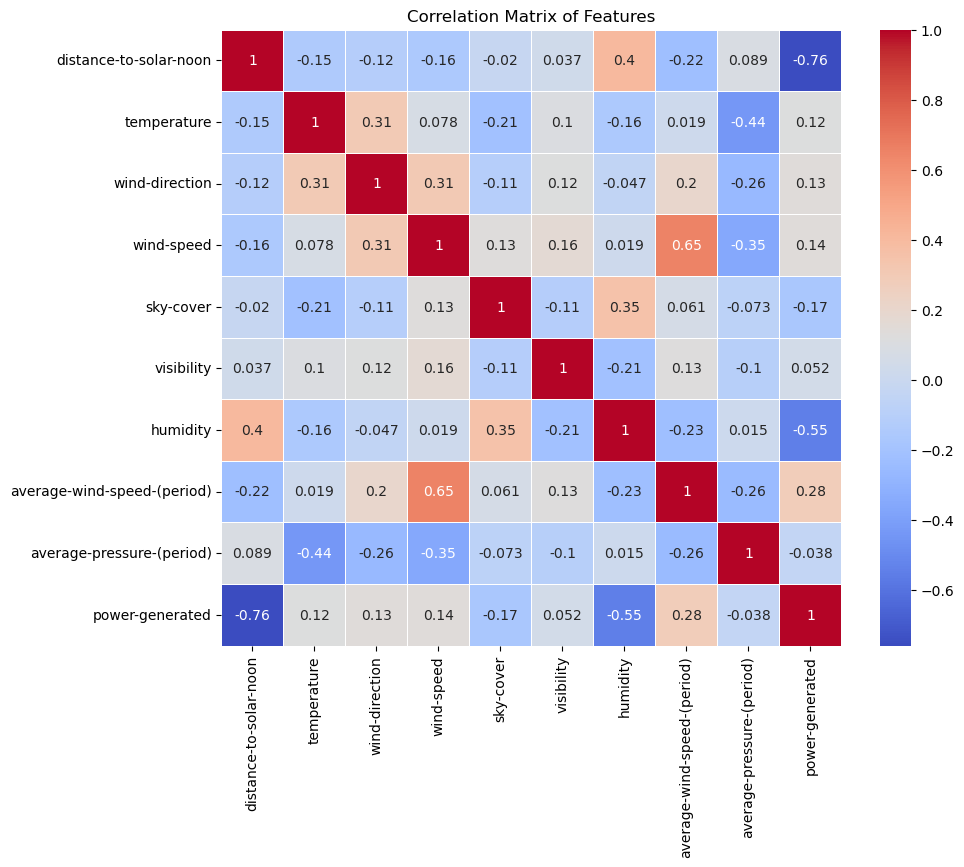

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Visualization: Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


### Exploratory Data Analysis (EDA)

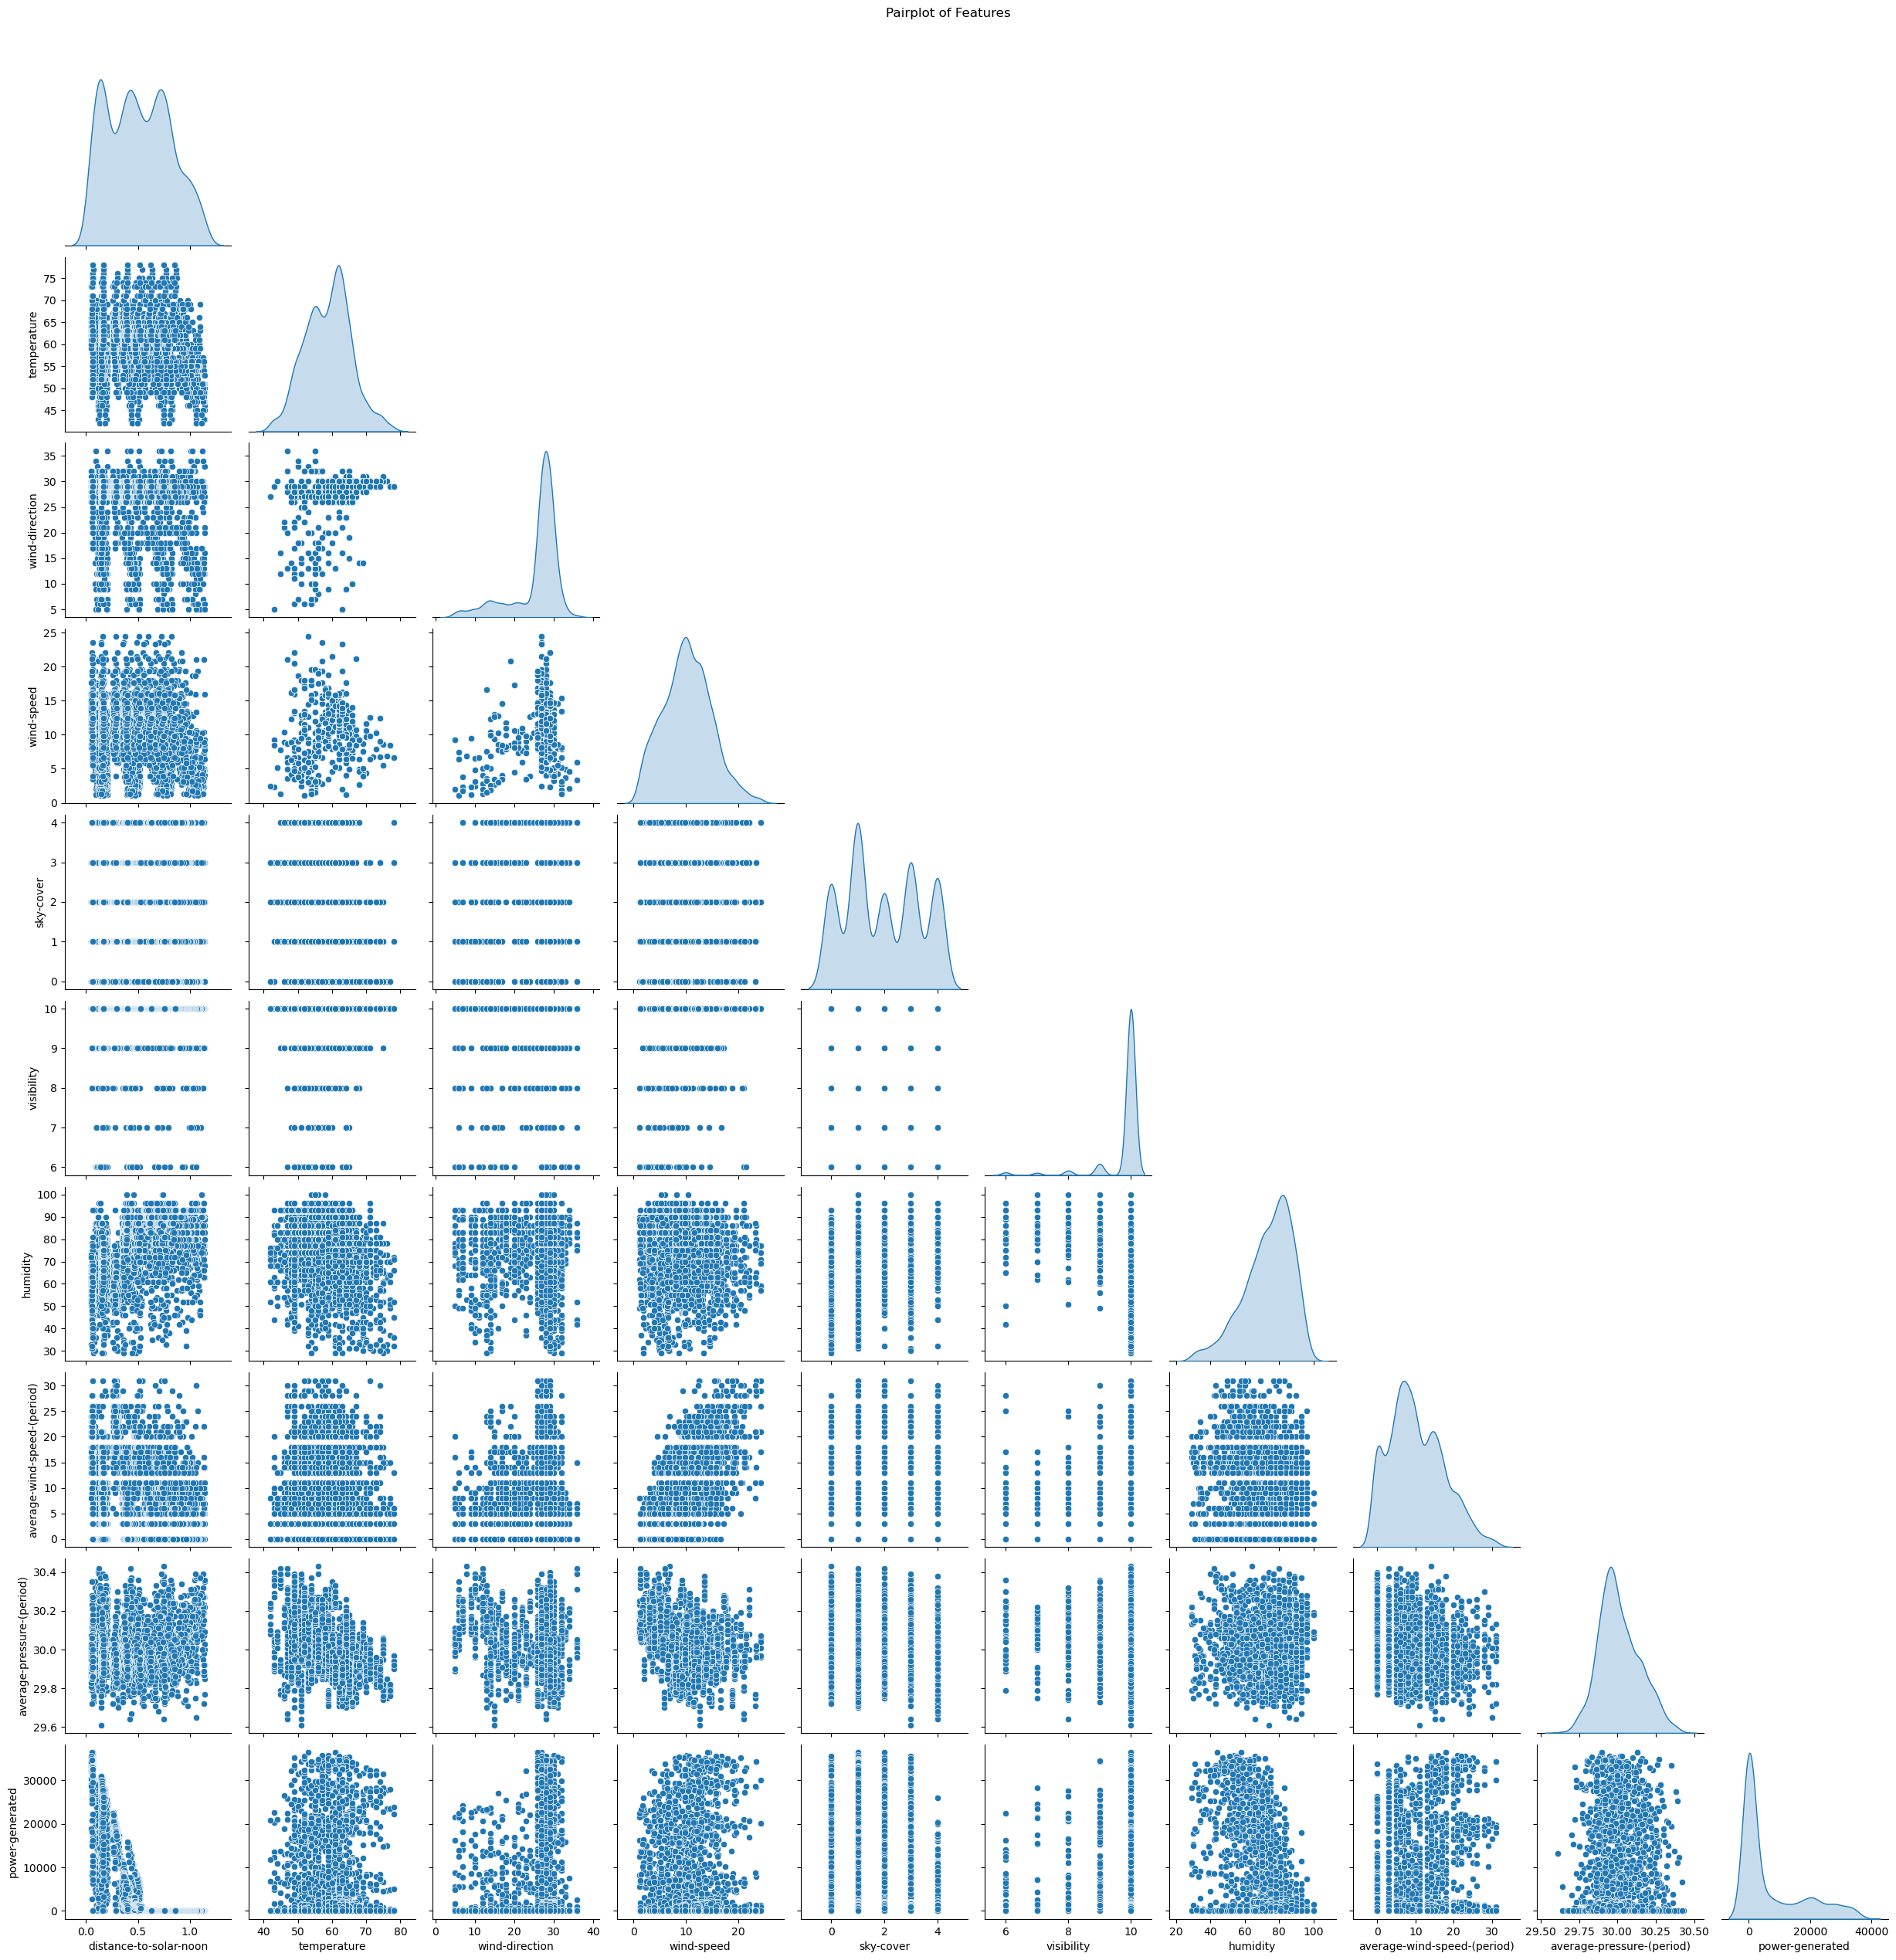

In [81]:
# Visualization: Pairplot to understand relationships
sns.pairplot(df, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

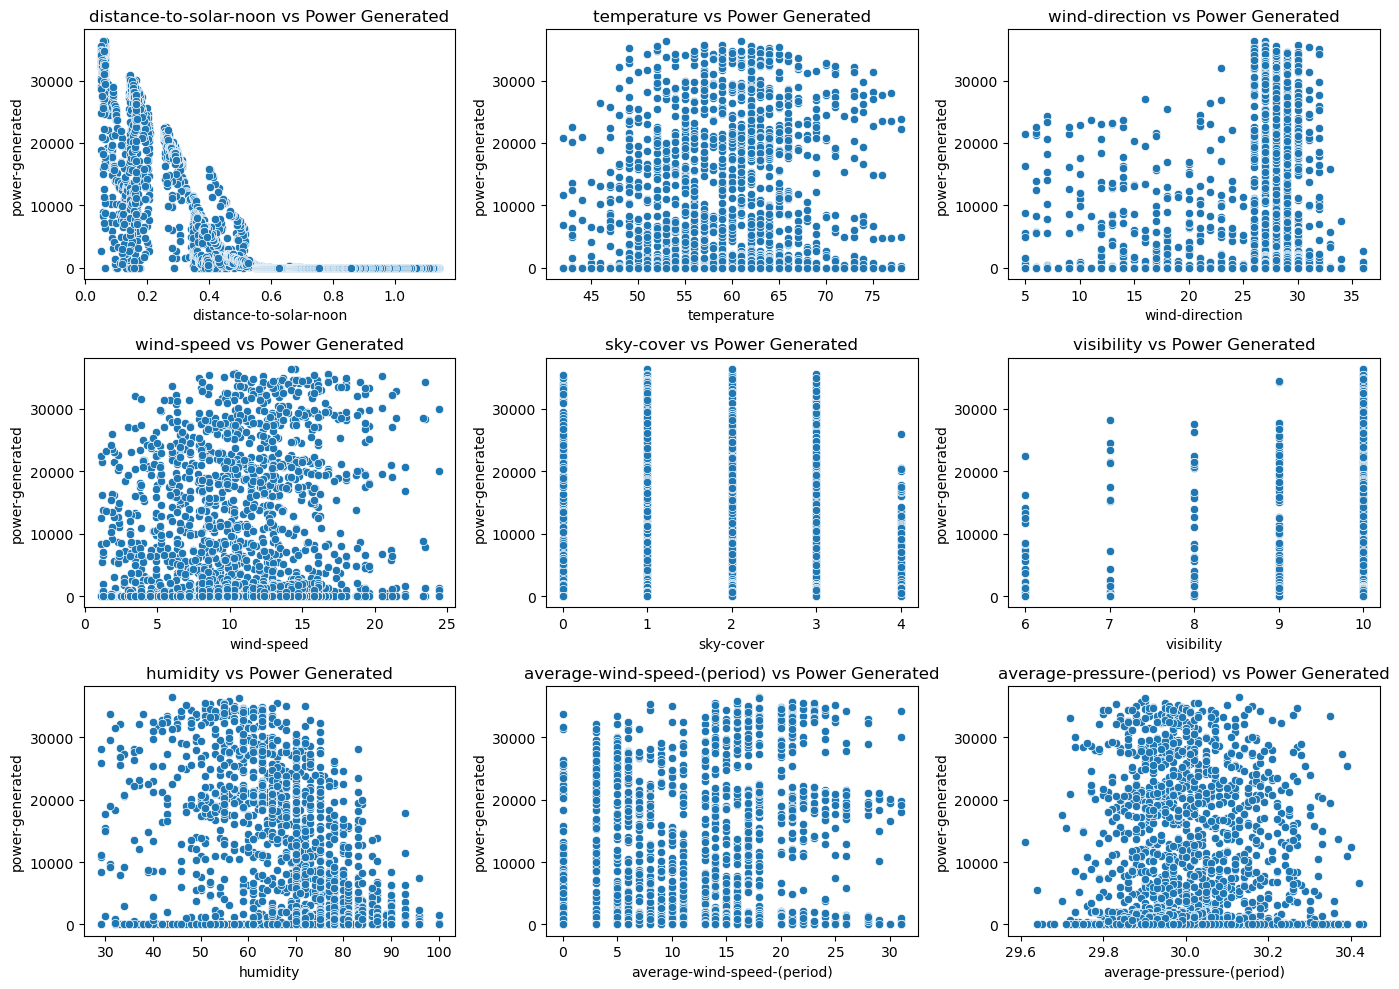

In [82]:
# Visualization: Scatter plot of key features vs. target
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['power-generated'])
    plt.title(f'{col} vs Power Generated')
plt.tight_layout()
plt.show()

### Model Selection and Training

In [83]:
from sklearn.model_selection import train_test_split

X = df.drop('power-generated', axis=1)
y = df['power-generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model 1: Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize and train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R^2: {r2_lr}, MAE: {mae_lr}")

Linear Regression - MSE: 36642089.91985653, R^2: 0.6467310210686983, MAE: 4895.992502798367


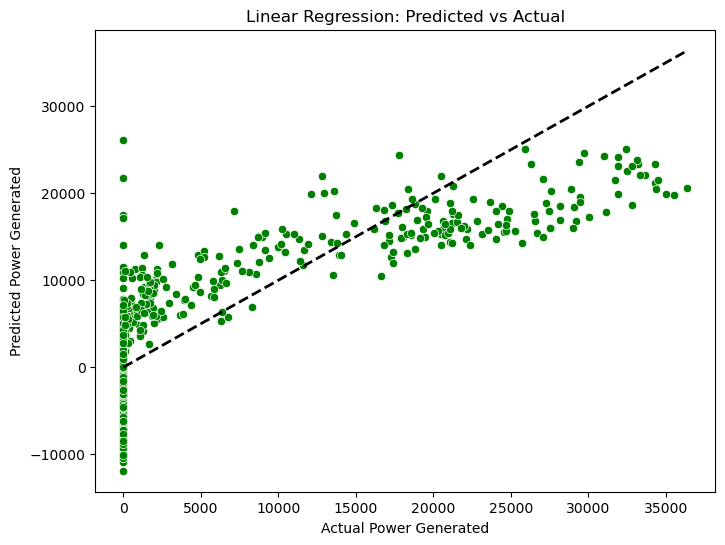

In [85]:
# Visualization: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.show()

### Model 2: Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R^2: {r2_rf}, MAE: {mae_rf}")

Random Forest - MSE: 6935404.938074163, R^2: 0.9331352707690163, MAE: 1291.3512081784386


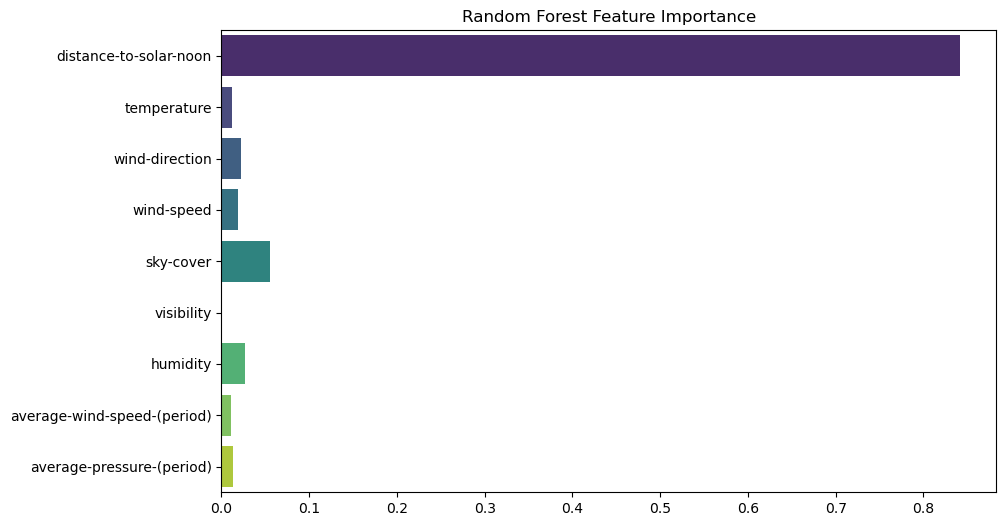

In [87]:
# Visualization: Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=model_rf.feature_importances_, y=X.columns, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

### Model 3: Gradient Boosting Regressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Predictions
y_pred_gb = model_gb.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, R^2: {r2_gb}, MAE: {mae_gb}")

Gradient Boosting - MSE: 6431712.481052167, R^2: 0.9379914053502245, MAE: 1423.4522123463717


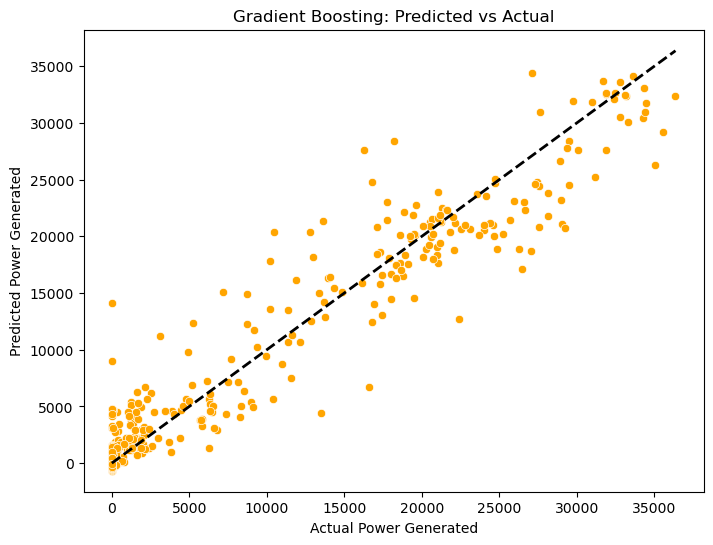

In [89]:
# Visualization: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Gradient Boosting: Predicted vs Actual')
plt.xlabel('Actual Power Generated')
plt.ylabel('Predicted Power Generated')
plt.show()

### Model 4: Support Vector Regression (SVR)

In [90]:
from sklearn.svm import SVR

# Initialize and train the model
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

# Predictions
y_pred_svr = model_svr.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"Support Vector Regression - MSE: {mse_svr}, R^2: {r2_svr}, MAE: {mae_svr}")

Support Vector Regression - MSE: 141451726.34687328, R^2: -0.36374609210132824, MAE: 6671.576426955293


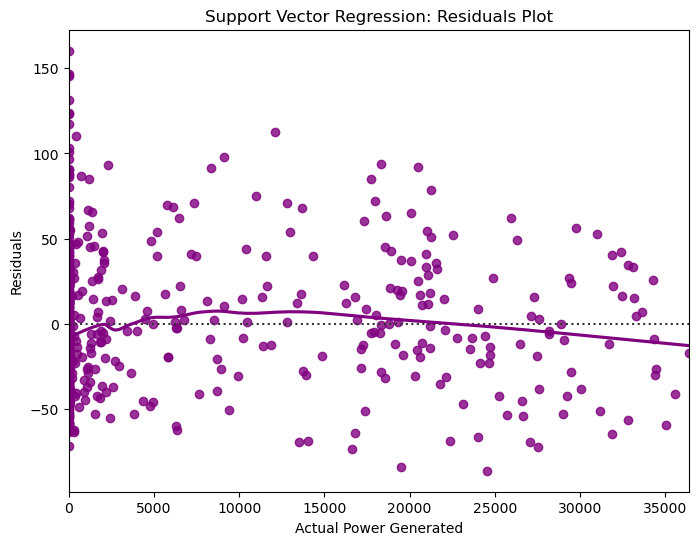

In [91]:
# Visualization: Residuals Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred_svr, lowess=True, color='purple')
plt.title('Support Vector Regression: Residuals Plot')
plt.xlabel('Actual Power Generated')
plt.ylabel('Residuals')
plt.show()

### Model Comparison

               Model           MSE       R^2          MAE
0  Linear Regression  3.664209e+07  0.646731  4895.992503
1      Random Forest  6.935405e+06  0.933135  1291.351208
2  Gradient Boosting  6.431712e+06  0.937991  1423.452212
3                SVR  1.414517e+08 -0.363746  6671.576427


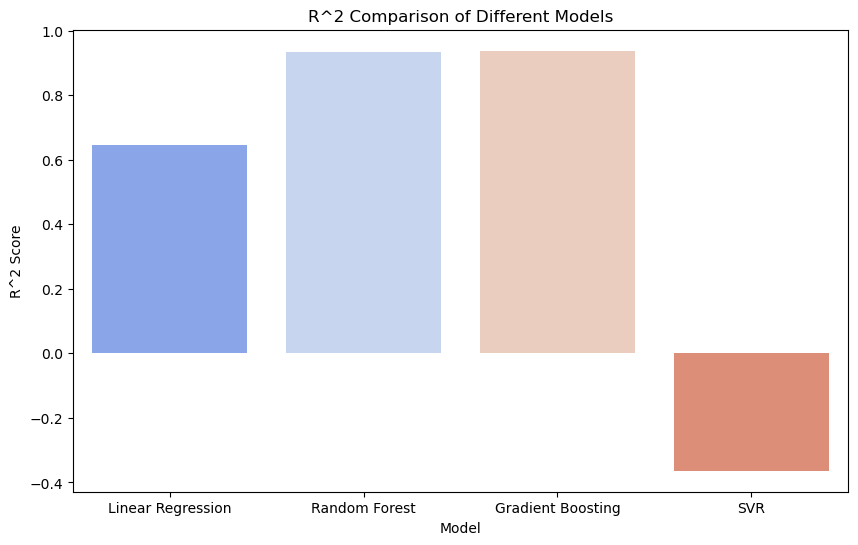

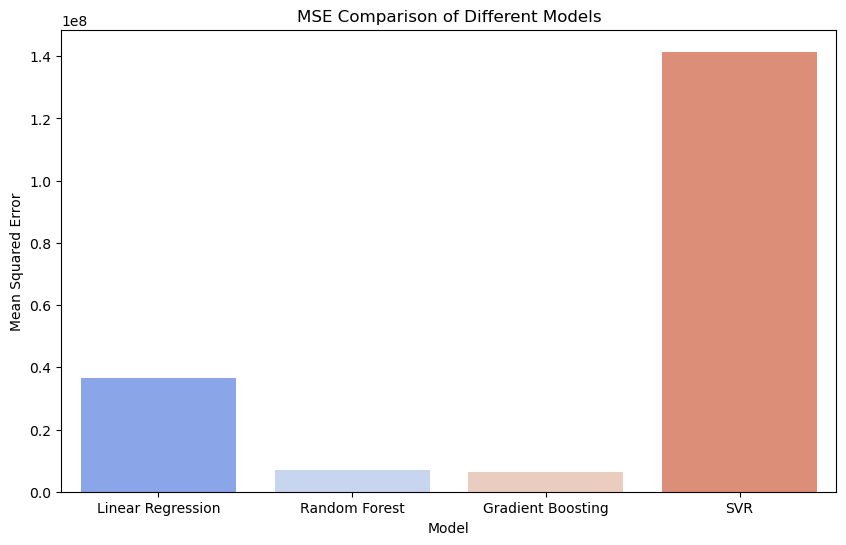

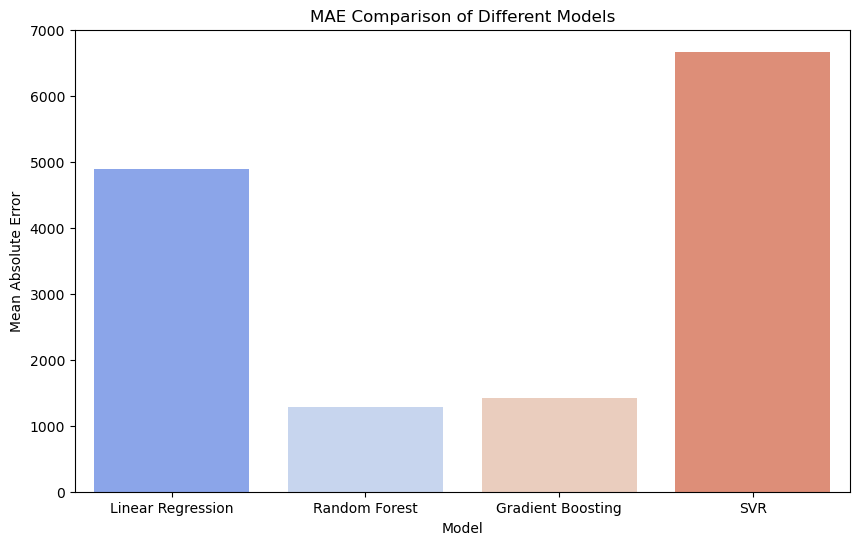

In [92]:
import matplotlib.pyplot as plt

# Collecting results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR'],
    'MSE': [mse_lr, mse_rf, mse_gb, mse_svr],
    'R^2': [r2_lr, r2_rf, r2_gb, r2_svr],
    'MAE': [mae_lr, mae_rf, mae_gb, mae_svr]
})

print(results)

# Visualization: R^2 Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results['Model'], y=results['R^2'], palette='coolwarm')
plt.title('R^2 Comparison of Different Models')
plt.ylabel('R^2 Score')
plt.show()

# Visualization: MSE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results['Model'], y=results['MSE'], palette='coolwarm')
plt.title('MSE Comparison of Different Models')
plt.ylabel('Mean Squared Error')
plt.show()

# Visualization: MAE Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=results['Model'], y=results['MAE'], palette='coolwarm')
plt.title('MAE Comparison of Different Models')
plt.ylabel('Mean Absolute Error')
plt.show()


Random Forest is the best model overall, with the lowest errors and a very high R² score, indicating strong predictive power and good fit to the data. Gradient Boosting is a close second, with almost comparable performance. Linear Regression and SVR are not as effective, with SVR performing the worst.